# Telecom Megaline Machine Learning
Continuation from the project of Telecom Statistical Data Analysis

Project Report by Allentine Paulis



# Table of Contents
* [Project Description](#description)
* [Data](#data)
* [Step 1. Understanding Data](#understanding)
* [Step 2. Splitting Data](#split)   
* [Step 3. Machine Learning model](#model)
    * [Decision Tree Classifier](#dtc)
    * [Random Forest Classifier](#rfc)
    * [K Neigbors Classifier](#knc)
    * [Model Comparison](#modelcomparison)
* [Step 4. Test Set Model](#test)
* [Step 5. Check Sanity Model](#check)
* [Step 6. Overall conclusion](#allconclusion)

# Project Description <a class="anchor" id="description"></a>
Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra.

We have access to behavior data about subscribers who have already switched to the new plans (from the project for the Statistical Data Analysis). For this classification task, we need to develop a model that will pick the right plan. Since we have already performed the data preprocessing step, we can move straight to creating the model.

Develop a model with the highest possible accuracy. In this project, the threshold for accuracy is 0.75. Check the accuracy using the test dataset.

# Data <a class="anchor" id="data"></a>
Every observation in the dataset contains monthly behavior information about one user. The information given is as follows:
- `сalls` — number of calls,
- `minutes` — total call duration in minutes,
- `messages` — number of text messages,
- `mb_used` — Internet traffic used in MB,
- `is_ultra` — plan for the current month (Ultra - 1, Smart - 0).

# Step 1. Understanding Data  <a class="anchor" id="understanding"></a>

In [41]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')

In [43]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [45]:
df.sample(10)

,calls,minutes,messages,mb_used,is_ultra
1620,47.0,351.45,0.0,23721.15,0
2177,38.0,301.27,37.0,28914.24,1
2031,52.0,385.11,0.0,17617.43,0
1799,110.0,734.50,12.0,16779.36,0
3095,63.0,409.35,0.0,4300.48,1
490,56.0,334.29,82.0,21969.01,0
2665,47.0,378.52,47.0,9804.44,0
1355,72.0,495.11,34.0,15887.37,0
330,52.0,423.56,118.0,14503.80,1
2943,0.0,0.00,17.0,12905.41,1


In [46]:
df.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [47]:
df.duplicated().sum()

0

## Conclusion

- There are 3214 rows
- There are 5 columns which are calls, minutes, messages, mb_used and is_ultra
- No missing values
- No duplicates

# Step 2. Splitting Data  <a class="anchor" id="split"></a>
Split the source data into a training set, a validation set, and a test set.

- Split the data into training and testing (80/20 is a good starting point).

In [48]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=12345)

In [49]:
df_train.shape

(2571, 5)

In [50]:
df_test.shape

(643, 5)

- Split the training data into training and validation (again, 80/20 is a fair split)

In [51]:
df_train, df_valid = train_test_split(df_train,test_size = 0.2, random_state=12345)

In [52]:
df_train.shape

(2056, 5)

In [53]:
df_valid.shape

(515, 5)

In [33]:
# Assign Target and Features Variables
X = df.drop('is_ultra', axis=1)
y = df['is_ultra']

# Train Sample
X_train = df_train.drop('is_ultra', axis=1)
y_train = df_train['is_ultra']

# Validation Sample
X_valid = df_valid.drop('is_ultra', axis=1)
y_valid = df_valid['is_ultra']

# Test Sample
X_test = df_test.drop('is_ultra', axis=1)
y_test = df_test['is_ultra']

In [34]:
print(f"train = {100*len(X_train)/len(df):.2f}%")
print(f"val = {100*len(X_valid)/len(df):.2f}%")
print(f"test = {100*len(X_test)/len(df):.2f}%")

train = 63.97%
val = 16.02%
test = 20.01%


## Conclusion
- Split the data into training and testing with 80/20 ratio as a good starting point.
- Then Split the training data into training and validation with 80/20 ratio.
- The Train data is 63.97% or 2056 rows, test data is 20.01% or 643 rows and the validation data is 16.02% or 515 rows.
- Features or X variable are calls, minutes, messages and mb_used
- Target or y variable is 'is_ultra'

# Step 3. Machine Learning model  <a class="anchor" id="model"></a>

Investigate the quality of different models by changing hyperparameters. Briefly describe the findings of the study.

## Decision Tree Classifier <a class="anchor" id="dtc"></a>

Depth: 1 Accuracy: 0.7223300970873786
Depth: 2 Accuracy: 0.7475728155339806
Depth: 3 Accuracy: 0.7553398058252427
Depth: 4 Accuracy: 0.7533980582524272
Depth: 5 Accuracy: 0.7572815533980582
Depth: 6 Accuracy: 0.7611650485436893
Depth: 7 Accuracy: 0.7650485436893204
Depth: 8 Accuracy: 0.7631067961165049
Depth: 9 Accuracy: 0.7533980582524272


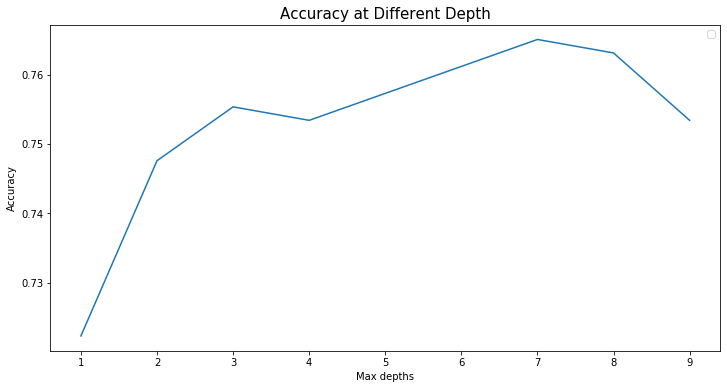

In [35]:
depths = []
DTC_accuracy = []

plt.figure(figsize=(12,6))

for depth in range(1,10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    score = accuracy_score(y_valid, y_pred)
    depths.append(depth)
    DTC_accuracy.append(score)
    print('Depth:', depth, end='')
    print(' Accuracy:', score)
sns.lineplot(data=pd.DataFrame(data=DTC_accuracy, index=depths))
plt.legend('')
plt.title("Accuracy at Different Depth", fontsize=15) 
plt.ylabel("Accuracy") 
plt.xlabel("Max depths")
plt.show()

## Random Forest Classifier <a class="anchor" id="rfc"></a>

Estimator: 10 Accuracy: 0.7650485436893204
Estimator: 15 Accuracy: 0.7689320388349514
Estimator: 20 Accuracy: 0.7728155339805826
Estimator: 25 Accuracy: 0.7689320388349514
Estimator: 30 Accuracy: 0.7766990291262136
Estimator: 35 Accuracy: 0.7786407766990291
Estimator: 40 Accuracy: 0.7786407766990291
Estimator: 45 Accuracy: 0.7786407766990291
Estimator: 50 Accuracy: 0.7786407766990291


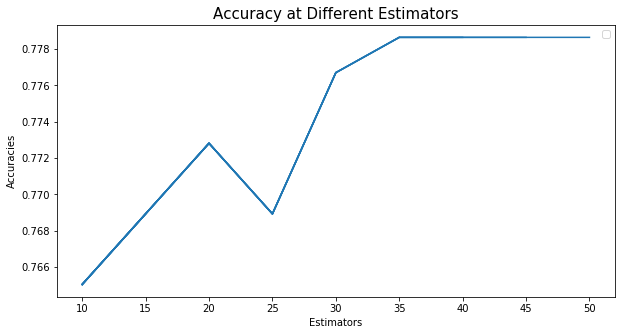

In [36]:
estimators = []
RFC_accuracy = []

plt.figure(figsize=(10, 5))

for estim in range(10,51,5):
    model = RandomForestClassifier(random_state=12345, n_estimators=estim)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    score = accuracy_score(y_valid, y_pred)
    estimators.append(estim)
    RFC_accuracy.append(score)
    print('Estimator:', estim, end='')
    print(' Accuracy:', score)
    sns.lineplot(data=pd.DataFrame(data=RFC_accuracy, index=estimators))
    plt.legend('')
plt.title("Accuracy at Different Estimators", fontsize=15) 
plt.ylabel("Accuracies") 
plt.xlabel("Estimators")
plt.show()

Using Random Forest Classifier, after n estimators = 35 (n estimators 35 or greater than 35), the accuracy is always the same 

## K Neighbors Classifier <a class="anchor" id="knc"></a>

Neighbors: 1 Accuracy: 0.6737864077669903
Neighbors: 4 Accuracy: 0.7475728155339806
Neighbors: 7 Accuracy: 0.7514563106796116
Neighbors: 10 Accuracy: 0.7611650485436893
Neighbors: 13 Accuracy: 0.7592233009708738
Neighbors: 16 Accuracy: 0.7436893203883496
Neighbors: 19 Accuracy: 0.7398058252427184
Neighbors: 22 Accuracy: 0.7359223300970874
Neighbors: 25 Accuracy: 0.7339805825242719




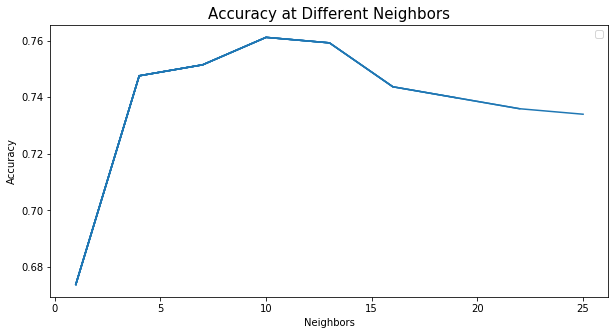

In [37]:
neighbors_list = []
KNC_accuracy = []

plt.figure(figsize=(10, 5))
for neighbors in range(1,28,3):
    model = KNeighborsClassifier(n_neighbors = neighbors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    score = accuracy_score(y_valid, y_pred)
    neighbors_list.append(neighbors)
    KNC_accuracy.append(score)
    print('Neighbors:', neighbors, end='')
    print(' Accuracy:', score)
    sns.lineplot(data=pd.DataFrame(data=KNC_accuracy, index=neighbors_list))
    plt.legend('')
    
print('\n')
plt.title("Accuracy at Different Neighbors", fontsize=15) 
plt.ylabel("Accuracy") 
plt.xlabel("Neighbors")
plt.show()

## Model Comparison <a class="anchor" id="modelcomparison"></a>

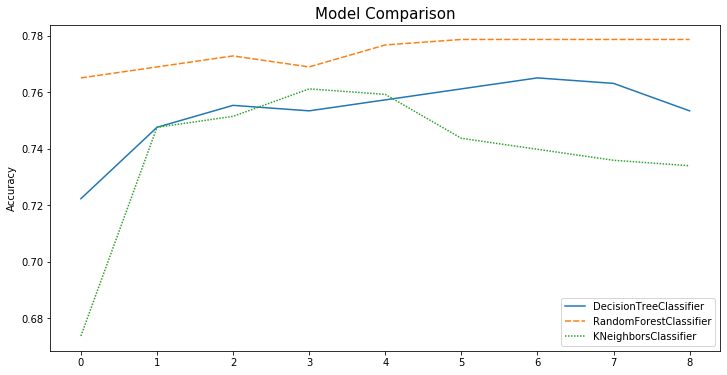

In [38]:
data = pd.DataFrame(columns=['DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier'])
data['DecisionTreeClassifier'] = DTC_accuracy
data['RandomForestClassifier'] = RFC_accuracy
data['KNeighborsClassifier'] = KNC_accuracy

plt.figure(figsize=(12,6))
plt.title('Model Comparison', fontsize=15)
plt.xlabel('')
plt.ylabel('Accuracy')
sns.lineplot(data=data)
plt.show()

## Conclusion

- The models used are : Decision Tree Classifier, Random Forest Classifier, and K Nearest Neighbors.
- It's classification problem so we used Classification model not regression model.
- Random state used is 12345
- The best Decision Tree Classifier is with Depth: 7 and Accuracy: 0.765
- The best Random Forest Classifier is with N Estimator: 35 and Accuracy: 0.7786
- Using Random Forest Classifier, after n estimators = 35 (n estimators 35 or greater than 35), the accuracy is always the same
- The best K Neighbors Classifier is with Neighbors: 10 and Accuracy: 0.761
- The **best model** is **Random Forest Classifier** with **n estimators = 35** and **accuracy 0.7786**

# Step 4. Test Set Model  <a class="anchor" id="test"></a>
Check the quality of the model using the test set.

In [40]:
rfc_model = RandomForestClassifier(random_state=12345, n_estimators=35)
rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score)

Accuracy: 0.7853810264385692


## Conclusion
- The **accuracy** on **test set** using **Random Forest Classifier** model with n estimators 35 is **0.785**

# Step 5. Check Sanity Model  <a class="anchor" id="check"></a>
Sanity check the model. 

In [55]:
df['is_ultra'].value_counts(normalize=True)*100

0    69.352831
1    30.647169
Name: is_ultra, dtype: float64

- 69.35% Smart plan
- 30.65% Ultra plan

## Conclusion
Let our model always predict the Smart plan. Then the accuracy of the model will be about 69%, but the accuracy of our best model is greater and equal to 78%. We can conclude that the sanity test was passed.

# Step 6. Overall Conclusion  <a class="anchor" id="allconclusion"></a>

- Machine Learning models used for this task are : Decision Tree Classifier, Random Forest Classifier, and K Nearest Neighbors.
- The task is classification problem so we used Classification model not regression model.
- The best Decision Tree Classifier is with Depth: 7 and Accuracy: 0.765
- The best Random Forest Classifier is with N Estimator: 35 and Accuracy: 0.7786
- Using Random Forest Classifier, after n estimators = 35 (n estimators 35 or greater than 35), the accuracy is always the same
- The best K Neighbors Classifier is with Neighbors: 10 and Accuracy: 0.761
- **Best model** for this task is **Random Forest Classifier** model with **n estimators 35** to get accuracy of 0.7786 on train and validation set and accuracy of **0.785 on test set**
- Sanity test passed. Assuming the model always predict the smart plan, the accuracy of the model will be about 69% based on the data provided. While the accuracy of our best model is greater and equal to 78%. In conclusion sanity of the model was passed. 